### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\HR Analytics\train.csv')
test = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\HR Analytics\test.csv')
sub = pd.read_csv(r'D:\Downloads\Data Science\Analytics_Vidya\Dataset\HR Analytics\ss.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [6]:
print(train.shape,test.shape,sub.shape)

(54808, 14) (23490, 13) (23490, 2)


### Data Preprocessing

In [7]:
train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [10]:
train['education'].fillna("Others",inplace=True)
test['education'].fillna("Others",inplace=True)

In [11]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'Others', 'Below Secondary'],
      dtype=object)

In [12]:
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [13]:
train['previous_year_rating'].mode()

0    3.0
dtype: float64

In [14]:
a = 3.0
train['previous_year_rating'].fillna(a,inplace=True)
test['previous_year_rating'].fillna(a,inplace=True)

In [15]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [16]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### EDA

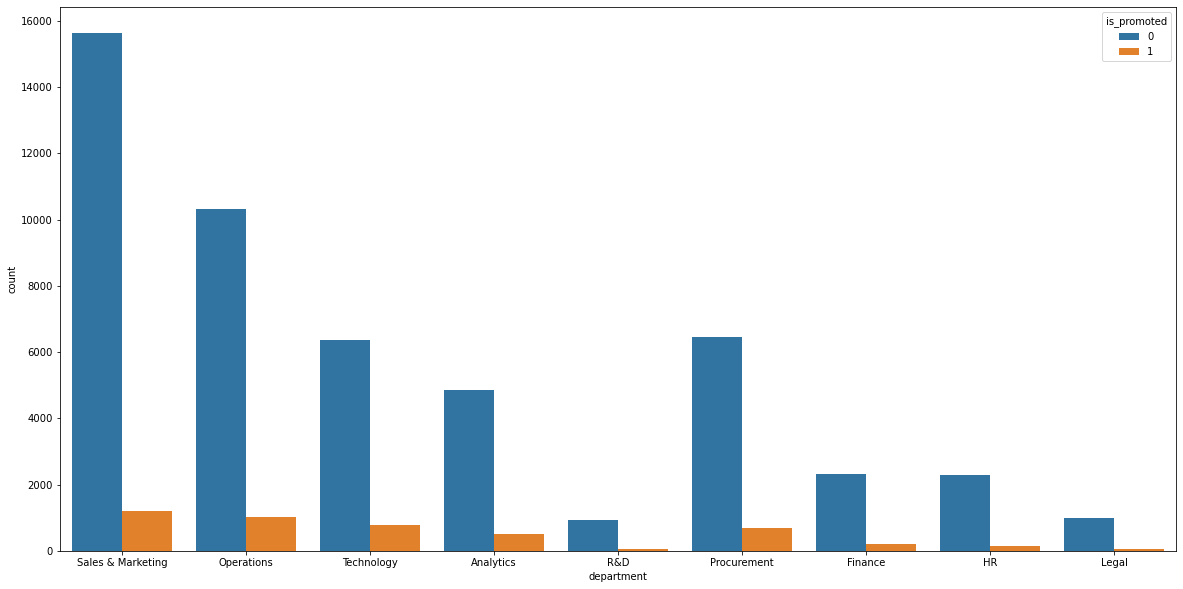

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=train,x = 'department',hue = 'is_promoted',ax=ax)

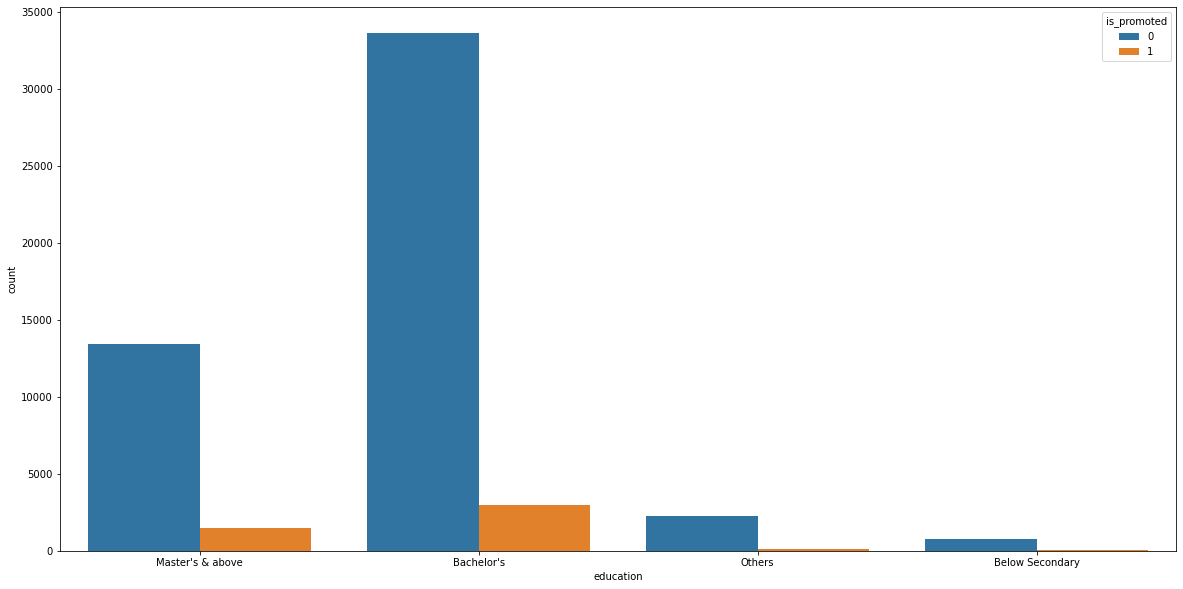

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=train,x = 'education',hue = 'is_promoted',ax=ax)

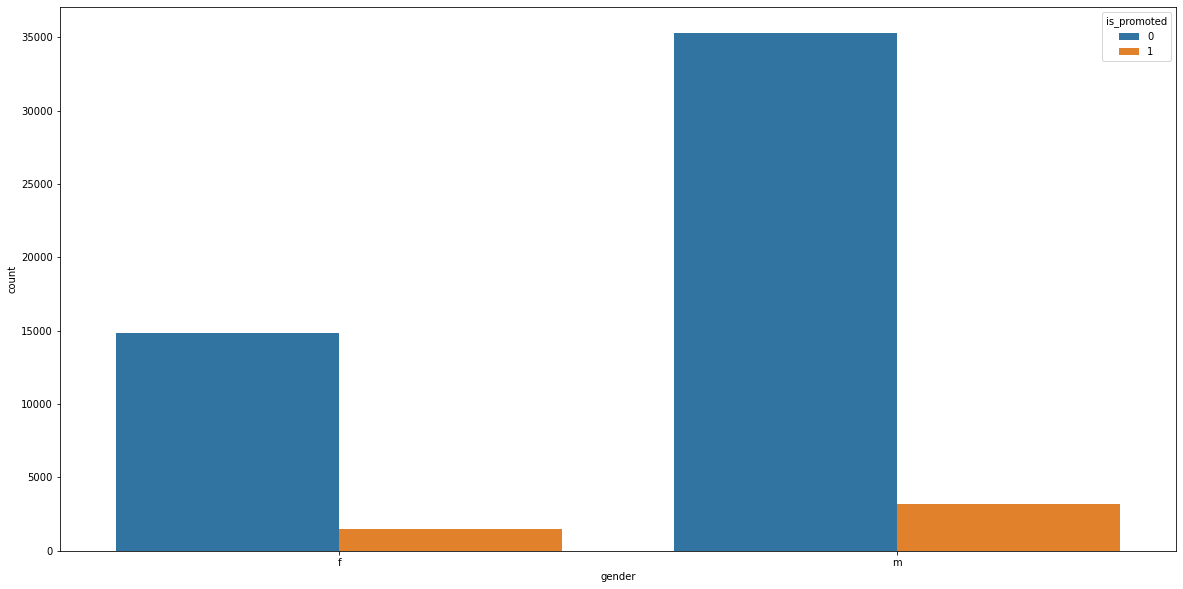

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=train,x = 'gender',hue = 'is_promoted',ax=ax)

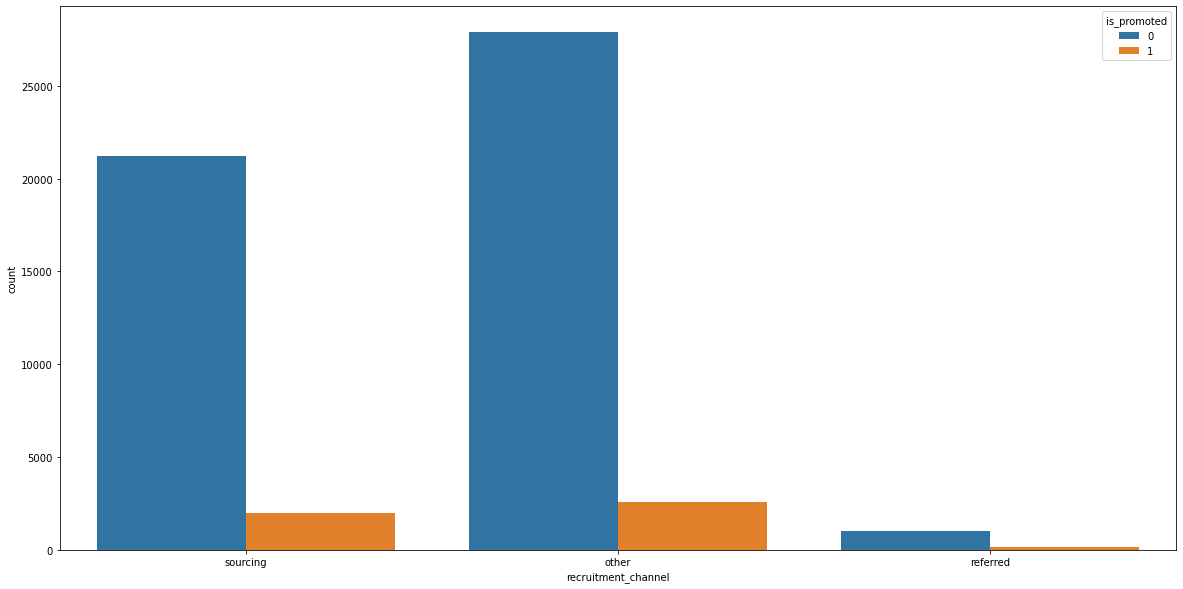

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(data=train,x = 'recruitment_channel',hue = 'is_promoted',ax=ax)

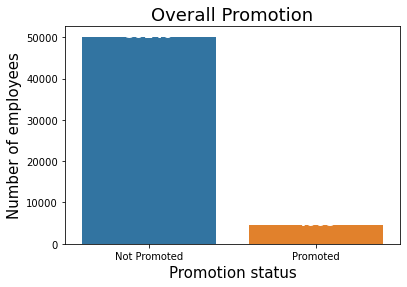

In [21]:
sns.countplot(x='is_promoted',data=train)
plt.xticks( np.arange(2), ['Not Promoted', 'Promoted'] )
plt.title('Overall Promotion',fontsize= 18)
# set x label
plt.xlabel('Promotion status',fontsize = 15)
# set y label
plt.ylabel('Number of employees',fontsize = 15)
labels = (train['is_promoted'].value_counts())
for i, v in enumerate(labels):
    plt.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

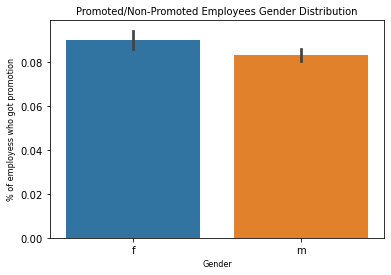

In [22]:
sns.barplot(x = "gender", y = "is_promoted", data=train)
plt.title("Promoted/Non-Promoted Employees Gender Distribution", fontsize =10)
labels = ['Female', 'Male']
plt.ylabel("% of employess who got promotion", fontsize = 8)
plt.xlabel("Gender",fontsize = 8)
plt.show()

In [23]:
print("% of women promoted: " , train[train.gender == 'f'].is_promoted.sum()/train[train.gender == 'f'].is_promoted.count())
print("% of men promoted:   " , train[train.gender == 'm'].is_promoted.sum()/train[train.gender == 'm'].is_promoted.count())

% of women promoted:  0.08993379107405591
% of men promoted:    0.08315149625935161


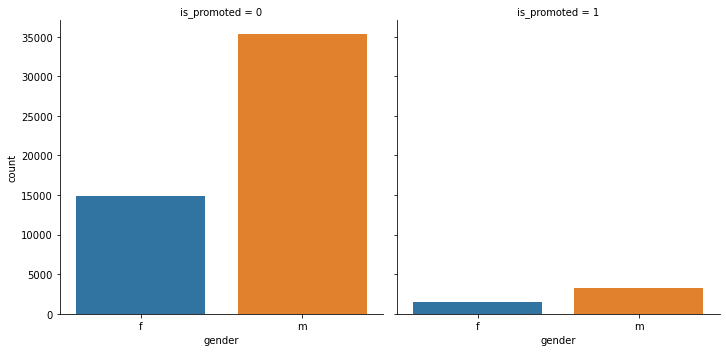

In [24]:
sns.catplot(x='gender', col='is_promoted', kind='count', data=train)
plt.show()

### Encoding Categorical Columns

In [25]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [26]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

##### Education

In [27]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'Others', 'Below Secondary'],
      dtype=object)

In [28]:
edu = {"Below Secondary":0,"Bachelor's":1,"Master's & above":2,"Others":3}
train["education"] = train["education"].apply(lambda x: edu[x])
test["education"] = test["education"].apply(lambda x: edu[x])

In [29]:
train['education'].unique()

array([2, 1, 3, 0], dtype=int64)

##### Department

In [30]:
train['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [31]:
test['department'].unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [32]:
dept = {"Sales & Marketing":0,"Operations":1,"Technology":2,"Analytics":3,"R&D":4,"Procurement":5,"Finance":6,"HR":7,"Legal":8}
train["department"] = train["department"].apply(lambda x: dept[x])
test["department"] = test["department"].apply(lambda x: dept[x])

In [33]:
train['department'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

##### Gender

In [34]:
train['gender'].unique()

array(['f', 'm'], dtype=object)

In [35]:
sex = {"f":0,"m":1}
train["gender"] = train["gender"].apply(lambda x: sex[x])
test["gender"] = test["gender"].apply(lambda x: sex[x])

In [36]:
train['gender'].unique()

array([0, 1], dtype=int64)

##### Recruitment Channel

In [37]:
train['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [38]:
rc = {"sourcing":0,"referred":1,"other":2}
train["recruitment_channel"] = train["recruitment_channel"].apply(lambda x: rc[x])
test["recruitment_channel"] = test["recruitment_channel"].apply(lambda x: rc[x])

In [39]:
train['recruitment_channel'].unique()

array([0, 2, 1], dtype=int64)

In [40]:
train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['region'] = labelencoder.fit_transform(train['region'])
test['region'] = labelencoder.fit_transform(test['region'])

In [42]:
train['region'].unique()

array([31, 14, 10, 15, 18, 11, 12, 27,  0, 28, 21, 24,  6,  5,  2, 29, 20,
        8,  4,  7, 17,  1, 19, 23,  3, 13, 32, 25, 30, 26, 16, 22, 33,  9])

### Splitting Data

In [43]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(train, test_size = 0.2)
print(train.shape,train_data.shape,test_data.shape)

(54808, 14) (43846, 14) (10962, 14)


### Feature Engineering

In [44]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
23755,14971,5,31,2,0,0,1,40,5.0,10,1,0,65,0
26789,62992,1,10,1,0,2,1,35,2.0,9,1,0,59,0
31530,72401,3,24,1,1,2,1,29,3.0,4,0,0,88,0
51356,2077,4,10,1,1,2,2,38,3.0,10,0,0,85,0
49287,68393,2,31,1,1,0,4,29,3.0,6,0,0,79,0


#### Department History

In [45]:
dept1 = train_data[train_data['is_promoted']==1].groupby('department').agg({'is_promoted':'count'}).reset_index()
dept1.columns = ['department','Promoted_Count']

dept2 = train_data.groupby('department').agg({'is_promoted':'count'}).reset_index()
dept2.columns = ['department','Total_Count']

In [46]:
dept2 = pd.merge(dept2,dept1,how='left',on='department')
dept2

,department,Total_Count,Promoted_Count
0,0,13465,985
1,1,9095,836
2,2,5685,597
3,3,4288,406
4,4,817,53
5,5,5722,553
6,6,2033,170
7,7,1937,104
8,8,804,44


In [47]:
dept2['Promoted_Count'].fillna(1,inplace=True)
dept2['Department_History'] = dept2['Promoted_Count']/dept2['Total_Count']
dept2 = dept2[['department','Department_History']]

In [48]:
dept2 = dept2[['department','Department_History']]
mean = dept2['Department_History'].mean()
l1 = {'department':['OTHERS'],'Department_History':[mean]}
df = pd.DataFrame(l1)
dept2 = dept2.append(df)
dept2

,department,Department_History
0,0,0.073153
1,1,0.091919
2,2,0.105013
3,3,0.094683
4,4,0.064871
5,5,0.096645
6,6,0.083620
7,7,0.053691
8,8,0.054726
0,OTHERS,0.079813


In [49]:
train_data = pd.merge(train_data,dept2,how='left',on='department')
test_data = pd.merge(test_data,dept2,how='left',on='department')
test = pd.merge(test,dept2,how='left',on='department')
train_data['Department_History'].isnull().sum()

0

In [50]:
train_data['Department_History'].corr(train_data['is_promoted'])

0.05049784090166536

#### Region History

In [51]:
reg1 = train_data[train_data['is_promoted']==1].groupby('region').agg({'is_promoted':'count'}).reset_index()
reg1.columns = ['region','Promoted_Count']

reg2 = train_data.groupby('region').agg({'is_promoted':'count'}).reset_index()
reg2.columns = ['region','Total_Count']

In [52]:
reg2 = pd.merge(reg2,reg1,how='left',on='region')
reg2

,region,Total_Count,Promoted_Count
0,0,495,49
1,1,525,45
2,2,1048,60
3,3,394,27
4,4,2127,192
5,5,663,55
6,6,2261,187
7,7,1182,81
8,8,653,93
9,9,25,1


In [53]:
reg2['Promoted_Count'].fillna(1,inplace=True)
reg2['Region_History'] = reg2['Promoted_Count']/reg2['Total_Count']
reg2 = reg2[['region','Region_History']]

In [54]:
reg2 = reg2[['region','Region_History']]
mean = reg2['Region_History'].mean()
l1 = {'region':['OTHERS'],'Region_History':[mean]}
df = pd.DataFrame(l1)
reg2 = reg2.append(df)
reg2

,region,Region_History
0,0,0.098990
1,1,0.085714
2,2,0.057252
3,3,0.068528
4,4,0.090268
5,5,0.082956
6,6,0.082707
7,7,0.068528
8,8,0.142420
9,9,0.040000


In [55]:
train_data = pd.merge(train_data,reg2,how='left',on='region')
test_data = pd.merge(test_data,reg2,how='left',on='region')
test = pd.merge(test,reg2,how='left',on='region')
train_data['Region_History'].isnull().sum()

0

In [56]:
train_data['Region_History'].corr(train_data['is_promoted'])

0.09178114872819207

#### Education History

In [57]:
edu1 = train_data[train_data['is_promoted']==1].groupby('education').agg({'is_promoted':'count'}).reset_index()
edu1.columns = ['education','Promoted_Count']

edu2 = train_data.groupby('education').agg({'is_promoted':'count'}).reset_index()
edu2.columns = ['education','Total_Count']

In [58]:
edu2 = pd.merge(edu2,edu1,how='left',on='education')
edu2

,education,Total_Count,Promoted_Count
0,0,634,50
1,1,29398,2438
2,2,11881,1161
3,3,1933,99


In [59]:
edu2['Promoted_Count'].fillna(1,inplace=True)
edu2['Education_History'] = edu2['Promoted_Count']/edu2['Total_Count']
edu2 = edu2[['education','Education_History']]

In [60]:
edu2 = edu2[['education','Education_History']]
mean = edu2['Education_History'].mean()
l1 = {'education':['OTHERS'],'Education_History':[mean]}
df = pd.DataFrame(l1)
edu2 = edu2.append(df)
edu2

,education,Education_History
0,0,0.078864
1,1,0.082931
2,2,0.097719
3,3,0.051216
0,OTHERS,0.077682


In [61]:
train_data = pd.merge(train_data,edu2,how='left',on='education')
test_data = pd.merge(test_data,edu2,how='left',on='education')
test = pd.merge(test,edu2,how='left',on='education')
train_data['Education_History'].isnull().sum()

0

In [62]:
train_data['Education_History'].corr(train_data['is_promoted'])

0.03528674622405587

##### Gender History

In [63]:
gen1 = train_data[train_data['is_promoted']==1].groupby('gender').agg({'is_promoted':'count'}).reset_index()
gen1.columns = ['gender','Promoted_Count']

gen2 = train_data.groupby('gender').agg({'is_promoted':'count'}).reset_index()
gen2.columns = ['gender','Total_Count']

In [64]:
gen2 = pd.merge(gen2,gen1,how='left',on='gender')
gen2

,gender,Total_Count,Promoted_Count
0,0,13050,1183
1,1,30796,2565


In [65]:
gen2['Promoted_Count'].fillna(1,inplace=True)
gen2['Gender_History'] = gen2['Promoted_Count']/gen2['Total_Count']
gen2 = gen2[['gender','Gender_History']]

In [66]:
gen2 = gen2[['gender','Gender_History']]
mean = gen2['Gender_History'].mean()
l1 = {'gender':['OTHERS'],'Gender_History':[mean]}
df = pd.DataFrame(l1)
gen2 = gen2.append(df)
gen2

,gender,Gender_History
0,0,0.090651
1,1,0.083290
0,OTHERS,0.086971


In [67]:
train_data = pd.merge(train_data,gen2,how='left',on='gender')
test_data = pd.merge(test_data,gen2,how='left',on='gender')
test = pd.merge(test,gen2,how='left',on='gender')
train_data['Gender_History'].isnull().sum()

0

In [68]:
train_data['Gender_History'].corr(train_data['is_promoted'])

0.01203776824906093

##### Recruitment Channel History

In [69]:
rc1 = train_data[train_data['is_promoted']==1].groupby('recruitment_channel').agg({'is_promoted':'count'}).reset_index()
rc1.columns = ['recruitment_channel','Promoted_Count']

rc2 = train_data.groupby('recruitment_channel').agg({'is_promoted':'count'}).reset_index()
rc2.columns = ['recruitment_channel','Total_Count']

In [70]:
rc2 = pd.merge(rc2,rc1,how='left',on='recruitment_channel')
rc2

,recruitment_channel,Total_Count,Promoted_Count
0,0,18592,1598
1,1,909,111
2,2,24345,2039


In [71]:
rc2['Promoted_Count'].fillna(1,inplace=True)
rc2['RC_History'] = rc2['Promoted_Count']/rc2['Total_Count']
rc2 = rc2[['recruitment_channel','RC_History']]

In [72]:
rc2 = rc2[['recruitment_channel','RC_History']]
mean = rc2['RC_History'].mean()
l1 = {'recruitment_channel':['OTHERS'],'RC_History':[mean]}
df = pd.DataFrame(l1)
rc2 = rc2.append(df)
rc2

,recruitment_channel,RC_History
0,0,0.085951
1,1,0.122112
2,2,0.083754
0,OTHERS,0.097273


In [73]:
train_data = pd.merge(train_data,rc2,how='left',on='recruitment_channel')
test_data = pd.merge(test_data,rc2,how='left',on='recruitment_channel')
test = pd.merge(test,rc2,how='left',on='recruitment_channel')
train_data['RC_History'].isnull().sum()

0

In [74]:
train_data['RC_History'].corr(train_data['is_promoted'])

0.019448099420103473

In [75]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Department_History,Region_History,Education_History,Gender_History,RC_History
0,14971,5,31,2,0,0,1,40,5.0,10,1,0,65,0,0.096645,0.104938,0.097719,0.090651,0.085951
1,62992,1,10,1,0,2,1,35,2.0,9,1,0,59,0,0.091919,0.060519,0.082931,0.090651,0.083754
2,72401,3,24,1,1,2,1,29,3.0,4,0,0,88,0,0.094683,0.061392,0.082931,0.083290,0.083754
3,2077,4,10,1,1,2,2,38,3.0,10,0,0,85,0,0.064871,0.060519,0.082931,0.083290,0.083754
4,68393,2,31,1,1,0,4,29,3.0,6,0,0,79,0,0.105013,0.104938,0.082931,0.083290,0.085951


##### Previous Year Rating History

In [76]:
train_data['previous_year_rating'] = train_data['previous_year_rating'].astype(str)
test_data['previous_year_rating'] = test_data['previous_year_rating'].astype(str)
test['previous_year_rating'] = test['previous_year_rating'].astype(str)

In [77]:
train_data['previous_year_rating'].unique()

array(['5.0', '2.0', '3.0', '4.0', '1.0'], dtype=object)

In [78]:
pyr1 = train_data[train_data['is_promoted']==1].groupby('previous_year_rating').agg({'is_promoted':'count'}).reset_index()
pyr1.columns = ['previous_year_rating','Promoted_Count']

pyr2 = train_data.groupby('previous_year_rating').agg({'is_promoted':'count'}).reset_index()
pyr2.columns = ['previous_year_rating','Total_Count']

In [79]:
pyr2 = pd.merge(pyr2,pyr1,how='left',on='previous_year_rating')
pyr2

,previous_year_rating,Total_Count,Promoted_Count
0,1.0,4975,72
1,2.0,3367,143
2,3.0,18226,1372
3,4.0,7843,655
4,5.0,9435,1506


In [80]:
pyr2['Promoted_Count'].fillna(1,inplace=True)
pyr2['Rating_History'] = pyr2['Promoted_Count']/pyr2['Total_Count']
pyr2 = pyr2[['previous_year_rating','Rating_History']]

In [81]:
pyr2 = pyr2[['previous_year_rating','Rating_History']]
mean = pyr2['Rating_History'].mean()
l1 = {'previous_year_rating':['OTHERS'],'Rating_History':[mean]}
df = pd.DataFrame(l1)
pyr2 = pyr2.append(df)
pyr2

,previous_year_rating,Rating_History
0,1.0,0.014472
1,2.0,0.042471
2,3.0,0.075277
3,4.0,0.083514
4,5.0,0.159618
0,OTHERS,0.075071


In [82]:
train_data = pd.merge(train_data,pyr2,how='left',on='previous_year_rating')
test_data = pd.merge(test_data,pyr2,how='left',on='previous_year_rating')
test = pd.merge(test,pyr2,how='left',on='previous_year_rating')
train_data['Rating_History'].isnull().sum()

0

In [83]:
train_data['Rating_History'].corr(train_data['is_promoted'])

0.1575679793595966

In [84]:
train_data['previous_year_rating'] = train_data['previous_year_rating'].astype(float)
test_data['previous_year_rating'] = test_data['previous_year_rating'].astype(float)
test['previous_year_rating'] = test['previous_year_rating'].astype(float)

In [85]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Department_History,Region_History,Education_History,Gender_History,RC_History,Rating_History
0,14971,5,31,2,0,0,1,40,5.0,10,1,0,65,0,0.096645,0.104938,0.097719,0.090651,0.085951,0.159618
1,62992,1,10,1,0,2,1,35,2.0,9,1,0,59,0,0.091919,0.060519,0.082931,0.090651,0.083754,0.042471
2,72401,3,24,1,1,2,1,29,3.0,4,0,0,88,0,0.094683,0.061392,0.082931,0.083290,0.083754,0.075277
3,2077,4,10,1,1,2,2,38,3.0,10,0,0,85,0,0.064871,0.060519,0.082931,0.083290,0.083754,0.075277
4,68393,2,31,1,1,0,4,29,3.0,6,0,0,79,0,0.105013,0.104938,0.082931,0.083290,0.085951,0.075277


In [86]:
train_data['age'] = np.log(train_data['age'])

In [87]:
train_data['age'].corr(train_data['is_promoted'])

-0.011198772898260184

#### KPI History

In [88]:
train_data['KPIs_met >80%'].value_counts()

0    28379
1    15467
Name: KPIs_met >80%, dtype: int64

In [89]:
train_data['KPIs_met >80%'] = train_data['KPIs_met >80%'].astype(str)
test_data['KPIs_met >80%'] = test_data['KPIs_met >80%'].astype(str)
test['KPIs_met >80%'] = test['KPIs_met >80%'].astype(str)

In [90]:
kpi1 = train_data[train_data['is_promoted']==1].groupby('KPIs_met >80%').agg({'is_promoted':'count'}).reset_index()
kpi1.columns = ['KPIs_met >80%','Promoted_Count']

kpi2 = train_data.groupby('KPIs_met >80%').agg({'is_promoted':'count'}).reset_index()
kpi2.columns = ['KPIs_met >80%','Total_Count']

In [91]:
kpi2 = pd.merge(kpi2,kpi1,how='left',on='KPIs_met >80%')
kpi2

,KPIs_met >80%,Total_Count,Promoted_Count
0,0,28379,1128
1,1,15467,2620


In [92]:
kpi2['Promoted_Count'].fillna(1,inplace=True)
kpi2['KPI_History'] = kpi2['Promoted_Count']/kpi2['Total_Count']
kpi2 = kpi2[['KPIs_met >80%','KPI_History']]

In [93]:
kpi2 = kpi2[['KPIs_met >80%','KPI_History']]
mean = kpi2['KPI_History'].mean()
l1 = {'KPIs_met >80%':['OTHERS'],'KPI_History':[mean]}
df = pd.DataFrame(l1)
kpi2 = kpi2.append(df)
kpi2

,KPIs_met >80%,KPI_History
0,0,0.039748
1,1,0.169393
0,OTHERS,0.104570


In [94]:
train_data = pd.merge(train_data,kpi2,how='left',on='KPIs_met >80%')
test_data = pd.merge(test_data,kpi2,how='left',on='KPIs_met >80%')
test = pd.merge(test,kpi2,how='left',on='KPIs_met >80%')
train_data['KPI_History'].isnull().sum()

0

In [95]:
train_data['KPI_History'].corr(train_data['is_promoted'])

0.22156281932207147

In [96]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?               int64
avg_training_score        int64
is_promoted               int64
Department_History      float64
Region_History          float64
Education_History       float64
Gender_History          float64
RC_History              float64
Rating_History          float64
KPI_History             float64
dtype: object

In [97]:
train_data['KPIs_met >80%'] = train_data['KPIs_met >80%'].astype(int)
test_data['KPIs_met >80%'] = test_data['KPIs_met >80%'].astype(int)
test['KPIs_met >80%'] = test['KPIs_met >80%'].astype(int)

In [98]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int32
awards_won?               int64
avg_training_score        int64
is_promoted               int64
Department_History      float64
Region_History          float64
Education_History       float64
Gender_History          float64
RC_History              float64
Rating_History          float64
KPI_History             float64
dtype: object

In [99]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,awards_won?,avg_training_score,is_promoted,Department_History,Region_History,Education_History,Gender_History,RC_History,Rating_History,KPI_History
0,14971,5,31,2,0,0,1,3.688879,5.0,10,...,0,65,0,0.096645,0.104938,0.097719,0.090651,0.085951,0.159618,0.169393
1,62992,1,10,1,0,2,1,3.555348,2.0,9,...,0,59,0,0.091919,0.060519,0.082931,0.090651,0.083754,0.042471,0.169393
2,72401,3,24,1,1,2,1,3.367296,3.0,4,...,0,88,0,0.094683,0.061392,0.082931,0.083290,0.083754,0.075277,0.039748
3,2077,4,10,1,1,2,2,3.637586,3.0,10,...,0,85,0,0.064871,0.060519,0.082931,0.083290,0.083754,0.075277,0.039748
4,68393,2,31,1,1,0,4,3.367296,3.0,6,...,0,79,0,0.105013,0.104938,0.082931,0.083290,0.085951,0.075277,0.039748


##### Training History

In [100]:
train_data['no_of_trainings'].value_counts()

1     35484
2      6416
3      1420
4       361
5       106
6        39
7         9
10        4
8         4
9         3
Name: no_of_trainings, dtype: int64

In [101]:
train_data['no_of_trainings'] = train_data['no_of_trainings'].astype(str)
test_data['no_of_trainings'] = test_data['no_of_trainings'].astype(str)
test['no_of_trainings'] = test['no_of_trainings'].astype(str)

In [102]:
tr1 = train_data[train_data['is_promoted']==1].groupby('no_of_trainings').agg({'is_promoted':'count'}).reset_index()
tr1.columns = ['no_of_trainings','Promoted_Count']

tr2 = train_data.groupby('no_of_trainings').agg({'is_promoted':'count'}).reset_index()
tr2.columns = ['no_of_trainings','Total_Count']

In [103]:
tr2 = pd.merge(tr2,tr1,how='left',on='no_of_trainings')
tr2

,no_of_trainings,Total_Count,Promoted_Count
0,1,35484,3137.0
1,10,4,NaN
2,2,6416,490.0
3,3,1420,97.0
4,4,361,19.0
5,5,106,3.0
6,6,39,2.0
7,7,9,NaN
8,8,4,NaN
9,9,3,NaN


In [104]:
tr2['Promoted_Count'].fillna(1,inplace=True)
tr2['Training_History'] = tr2['Promoted_Count']/tr2['Total_Count']
tr2 = tr2[['no_of_trainings','Training_History']]

In [105]:
tr2 = tr2[['no_of_trainings','Training_History']]
mean = tr2['Training_History'].mean()
l1 = {'no_of_trainings':['OTHERS'],'Training_History':[mean]}
df = pd.DataFrame(l1)
tr2 = tr2.append(df)
tr2

,no_of_trainings,Training_History
0,1,0.088406
1,10,0.250000
2,2,0.076372
3,3,0.068310
4,4,0.052632
5,5,0.028302
6,6,0.051282
7,7,0.111111
8,8,0.250000
9,9,0.333333


In [106]:
train_data = pd.merge(train_data,tr2,how='left',on='no_of_trainings')
test_data = pd.merge(test_data,tr2,how='left',on='no_of_trainings')
test = pd.merge(test,tr2,how='left',on='no_of_trainings')
train_data['Training_History'].isnull().sum()

0

In [107]:
train_data['Training_History'].corr(train_data['is_promoted'])

0.020115366150369705

In [108]:
train_data['no_of_trainings'] = train_data['no_of_trainings'].astype(int)
test_data['no_of_trainings'] = test_data['no_of_trainings'].astype(int)
test['no_of_trainings'] = test['no_of_trainings'].astype(int)

In [109]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int32
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int32
awards_won?               int64
avg_training_score        int64
is_promoted               int64
Department_History      float64
Region_History          float64
Education_History       float64
Gender_History          float64
RC_History              float64
Rating_History          float64
KPI_History             float64
Training_History        float64
dtype: object

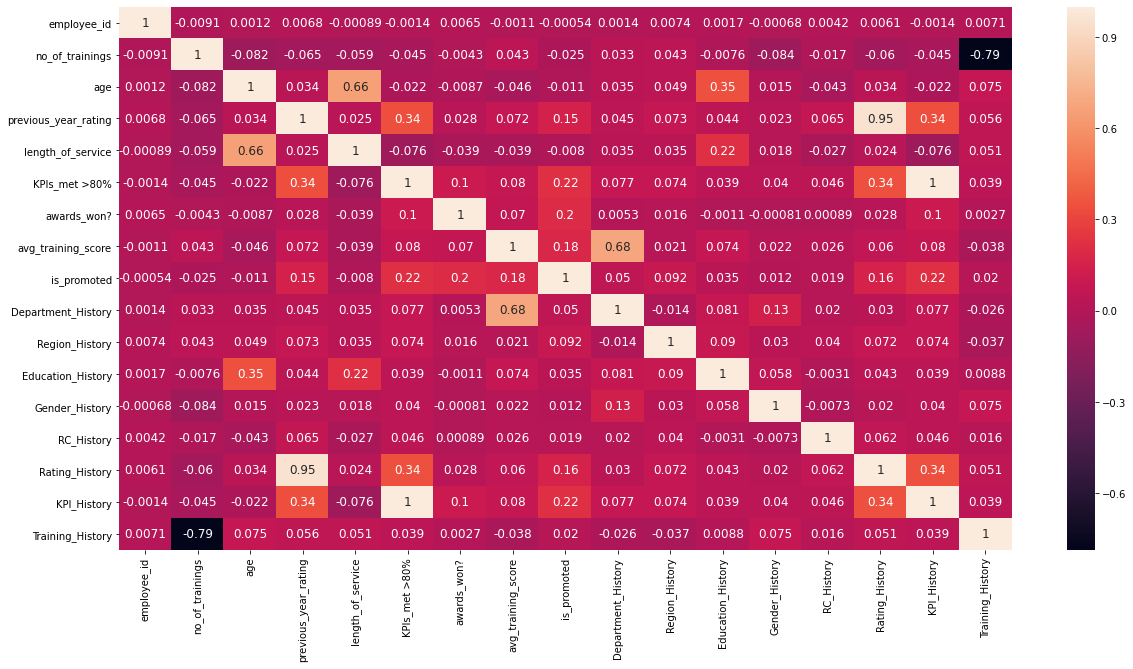

In [110]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True,annot_kws={'size':12})

In [143]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score,is_promoted,Department_History,Region_History,Education_History,Gender_History,RC_History,Rating_History,KPI_History,Training_History
0,14971,5,31,2,0,0,1,3.688879,5.0,10,...,65,0,0.096645,0.104938,0.097719,0.090651,0.085951,0.159618,0.169393,0.088406
1,62992,1,10,1,0,2,1,3.555348,2.0,9,...,59,0,0.091919,0.060519,0.082931,0.090651,0.083754,0.042471,0.169393,0.088406
2,72401,3,24,1,1,2,1,3.367296,3.0,4,...,88,0,0.094683,0.061392,0.082931,0.083290,0.083754,0.075277,0.039748,0.088406
3,2077,4,10,1,1,2,2,3.637586,3.0,10,...,85,0,0.064871,0.060519,0.082931,0.083290,0.083754,0.075277,0.039748,0.076372
4,68393,2,31,1,1,0,4,3.367296,3.0,6,...,79,0,0.105013,0.104938,0.082931,0.083290,0.085951,0.075277,0.039748,0.052632


In [144]:
train_data['length_of_service'].unique()

array([10,  9,  4,  6,  5,  8,  2, 17,  7, 18,  3, 15,  1, 12, 16, 19, 13,
       21, 11, 14, 20, 25, 23, 28, 24, 22, 26, 27, 31, 29, 32, 33, 30, 34,
       37], dtype=int64)

In [145]:
features = ['previous_year_rating','awards_won?','KPI_History','avg_training_score','Department_History',
            'Region_History','Education_History','KPIs_met >80%','Rating_History','Training_History']

### Modelling on Train Data

In [124]:
x_train = train_data[features]
y_train = train_data['is_promoted']

x_test = test_data[features]
y_test = test_data['is_promoted']

In [125]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(43846, 10) (43846,) (10962, 10) (10962,)


In [126]:
x_test.isna().sum()

previous_year_rating    0
awards_won?             0
KPI_History             0
avg_training_score      0
Department_History      0
Region_History          0
Education_History       0
KPIs_met >80%           0
Rating_History          0
Training_History        0
dtype: int64

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#### RANDOM FOREST

In [128]:
clf = RandomForestClassifier(n_estimators=5,max_depth=13,random_state=10,class_weight={0:4.07,1:9.5})
clf.fit(x_train,y_train)
rfc_pred = clf.predict(x_test)

In [129]:
print(train.is_promoted.value_counts())
print('--------------------------------------------------------------------------')
print(confusion_matrix(y_test, rfc_pred))
print('--------------------------------------------------------------------------')
print(classification_report(y_test, rfc_pred))

0    50140
1     4668
Name: is_promoted, dtype: int64
--------------------------------------------------------------------------
[[9927  115]
 [ 634  286]]
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10042
           1       0.71      0.31      0.43       920

    accuracy                           0.93     10962
   macro avg       0.83      0.65      0.70     10962
weighted avg       0.92      0.93      0.92     10962



In [130]:
clf.score(x_test,y_test)*100

93.16730523627076

#### LIGHT GBM

In [131]:
x_train.dtypes

previous_year_rating    float64
awards_won?               int64
KPI_History             float64
avg_training_score        int64
Department_History      float64
Region_History          float64
Education_History       float64
KPIs_met >80%             int32
Rating_History          float64
Training_History        float64
dtype: object

In [154]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(objective = 'binary',
                    n_estimators=20000,
                    reg_alpha = 0.1,
                    reg_lambda=0.1,
                    n_jobs=-1,
                    colsample_bytree=.8,
                    min_child_weight=8,
                    subsample=0.8715623,
                    min_data_in_leaf=400,
                    nthread=4,
                    metric = 'f1',
                    num_leaves = 900,
                    learning_rate = 0.01,
                    verbosity = -1,
                    seed= 120,
                    max_bin=60,
                    max_depth=15,
                    min_gain_to_split=.0222415,
                    scale_pos_weight=1)
lgbm.fit(x_train,y_train)
lgbm_pred = lgbm.predict(x_test)

In [155]:
print(confusion_matrix(y_test, lgbm_pred))
print('--------------------------------------------------------------------------')
print(classification_report(y_test, lgbm_pred))

[[10010    32]
 [  597   323]]
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10042
           1       0.91      0.35      0.51       920

    accuracy                           0.94     10962
   macro avg       0.93      0.67      0.74     10962
weighted avg       0.94      0.94      0.93     10962



#### CATBOOST

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=250, depth=10,learning_rate=0.02,loss_function='Logloss')
cat.fit(x_train, y_train)
cat_pred = cat.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, cat_pred))
print('--------------------------------------------------------------------------')
print(classification_report(y_test, cat_pred))

### Modelling on Test Data

In [134]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
Department_History      0
Region_History          0
Education_History       0
Gender_History          0
RC_History              0
Rating_History          0
KPI_History             0
Training_History        0
dtype: int64

In [135]:
X_train = train_data[features]
Y_train = train_data['is_promoted']
X_test = test[features]

#### LIGHT GBM

In [147]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier(objective = 'binary',
                    n_estimators=10000,
                    reg_alpha = 0.1,
                    reg_lambda=0.1,
                    n_jobs=-1,
                    colsample_bytree=.8,
                    min_child_weight=8,
                    subsample=0.8715623,
                    min_data_in_leaf=200,
                    nthread=4,
                    metric = 'f1',
                    num_leaves = 600,
                    learning_rate = 0.01,
                    verbosity = -1,
                    seed= 120,
                    max_bin=60,
                    max_depth=15,
                    min_gain_to_split=.0222415,
                    scale_pos_weight=2)
lgbm.fit(X_train,Y_train)
lgbm_pred_test = lgbm.predict(X_test)

In [137]:
sub['is_promoted'].value_counts()

0    23490
Name: is_promoted, dtype: int64

In [138]:
sub['employee_id'] = test['employee_id']

In [139]:
sub['is_promoted'] = lgbm_pred_test

In [140]:
#sub['is_promoted'] = sub['is_promoted'].astype(int)

In [141]:
sub.shape

(23490, 2)

In [142]:
sub.to_csv("D:\Downloads\Data Science\Analytics_Vidya\Output\HR Analytics\LGBM6.csv")